<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Artificial-Intelligence/blob/main/TF04_RNN_e_Classifica%C3%A7%C3%A3o_de_Textos_Slide_77_IMDB_Classifica%C3%A7%C3%A3o_de_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodrigo Rene Menegazzo

Prática: Classificação de Reviews IMDB

IMDB
  * Base de reviews do IMDB
  * Cada avaliação é uma lista de palavras
  * As palavras já estão codificadas
    * Não precisa de tokenizer
  * Detectar se é uma avaliação positiva ou negativa
  * Avaliações possuem tamanhos diferentes
    * Precisa padronizar para entrada na rede
  * Sentimento: 0 – Negativo / 1 - Positivo

Importações

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
tf.__version__

'2.8.2'

Carga da Base IMDB

In [2]:
num_words = 20000 # número de palavras
maxlen = 200 # máximo palavras no review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


Algumas verificações

In [3]:
print(x_train.shape)

print(x_train)

(25000,)
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 

Algumas verificações – tamanhos dos reviews

In [4]:
print(len(x_train[0]), len(x_train[1]))

218 189


Transforma as reviews para ter o mesmo tamanho

In [5]:
x_train = pad_sequences(x_train, maxlen=maxlen)
print(len(x_train[0]), len(x_train[1]))

200 200


In [6]:
x_test = pad_sequences(x_test, maxlen=maxlen)
print(len(x_test[0]), len(x_test[1]))

200 200


Construir o Modelo

In [7]:
# Construir a RNN
# recebe como entrada maxlen palavras
i = Input(shape=(x_train.shape[1], ))
# com textos precisa da camada de
# - representação numérica das palavras
# num_words palavras e 128 características para representar
# cada palavra (colunas)
# Não tem relação com a quantidade de unidades da LSTM
x = Embedding(input_dim=num_words, output_dim=128)(i)
x = LSTM(units=128, activation="tanh")(x)
x = Dense(units=1, activation="sigmoid")(x)
model = Model(i, x)

Compilar o Modelo

In [8]:
# para RNN melhor rmsprop
model.compile(optimizer="rmsprop", loss="binary_crossentropy",
metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


  Treinar o Modelo

In [9]:
epochs = 10
r = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/10
196/196 [==============================] - 112s 563ms/step - loss: 0.4589 - accuracy: 0.7987
Epoch 2/10
196/196 [==============================] - 110s 562ms/step - loss: 0.2737 - accuracy: 0.8960
Epoch 3/10
196/196 [==============================] - 108s 549ms/step - loss: 0.2201 - accuracy: 0.9184
Epoch 4/10
196/196 [==============================] - 107s 548ms/step - loss: 0.1783 - accuracy: 0.9357
Epoch 5/10
196/196 [==============================] - 109s 555ms/step - loss: 0.1483 - accuracy: 0.9479
Epoch 6/10
196/196 [==============================] - 108s 549ms/step - loss: 0.1189 - accuracy: 0.9576
Epoch 7/10
196/196 [==============================] - 108s 552ms/step - loss: 0.0979 - accuracy: 0.9654
Epoch 8/10
196/196 [==============================] - 107s 547ms/step - loss: 0.0822 - accuracy: 0.9718
Epoch 9/10
196/196 [==============================] - 106s 543ms/step - loss: 0.0655 - accuracy: 0.9782
Epoch 10/10
196/196 [==============================] - 107s 548m

Gráfico da loss-function e acurácia

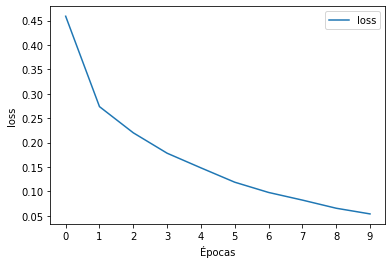

In [10]:
plt.plot( r.history["loss"], label="loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

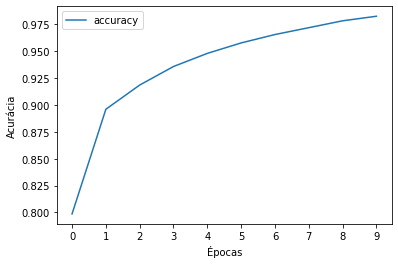

In [11]:
plt.plot( r.history["accuracy"], label="accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

Avaliação na base de Teste

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

782/782 [==============================] - 39s 49ms/step - loss: 0.5886 - accuracy: 0.8547


In [13]:
print(test_accuracy)

0.8547199964523315


Efetuar uma predição

In [17]:
texto = [[16, 3, 3, 444, 4, 12, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43]]
entrada = pad_sequences(texto, 200)
np.round(model.predict(entrada))

array([[0.]], dtype=float32)